# 15 Opening Leapfrog Meshes and GoCAD TSurfaces with GemGIS

Several different modeling packages store their data in different data types. The following illustrates how to load Leapfrog meshes (.msh-files) and GoCAD TSurfaces (.ts-files) with GemGIS and convert them to a plotable PyVista format.


<img src="../images/tutorial15_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/15_opening_leapfrog_meshes_and_gocad_tsurfaces/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="15_opening_leapfrog_meshes_and_gocad_tsurfaces.zip", dirpath=file_path)

## Reading Leapfrog Meshes

### Loading the Mesh Data

The Leapfrog mesh (.msh) is loaded and parsed with ``read_msh(..)``. A dictionary containing the face and vertex data will be returned.

In [3]:
import numpy as np

data = gg.raster.read_msh(file_path + 'GM_Granodiorite.msh')

In [4]:
data

{'Tri': array([[    0,     1,     2],
        [    0,     3,     1],
        [    4,     3,     0],
        ...,
        [53677, 53672, 53680],
        [53679, 53677, 53680],
        [53673, 53672, 53677]]),
 'Location': array([[ 1.44625109e+06,  5.24854344e+06, -1.12743862e+02],
        [ 1.44624766e+06,  5.24854640e+06, -1.15102216e+02],
        [ 1.44624808e+06,  5.24854657e+06, -1.15080548e+02],
        ...,
        [ 1.44831008e+06,  5.24896679e+06, -1.24755449e+02],
        [ 1.44830385e+06,  5.24896985e+06, -1.33694397e+02],
        [ 1.44829874e+06,  5.24897215e+06, -1.42506587e+02]])}

In [5]:
data.keys()

dict_keys(['Tri', 'Location'])

### Converting Mesh Data to PyVista PolyData

The loaded data will now be converted to PyVista PolyData using ``create_polydata_from_msh(..)``.

In [6]:
surf = gg.visualization.create_polydata_from_msh(data)
surf

PolyData (0x276cf76a5c0)
  N Cells:	107358
  N Points:	53681
  N Strips:	0
  X Bounds:	1.444e+06, 1.449e+06
  Y Bounds:	5.246e+06, 5.249e+06
  Z Bounds:	-2.464e+02, 7.396e+02
  N Arrays:	1

### Plotting the data

Once converted, the data can easily be plotted using PyVista.

C:\Users\ale93371\Anaconda3\envs\gemgis_test\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


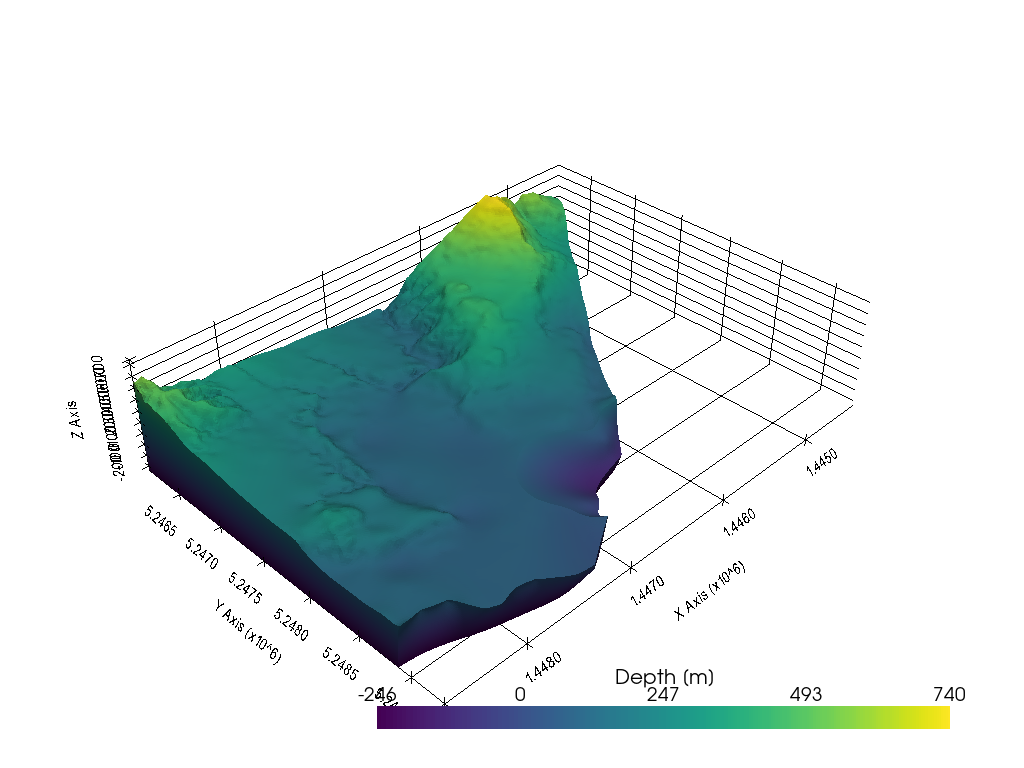

In [7]:
import pyvista as pv 
sargs = dict(fmt="%.0f", color='black')
p = pv.Plotter(notebook=True)

p.add_mesh(surf, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

## Reading GoCAD TSurfaces

### Loading the Mesh Data

The GoCAD mesh (.ts) is loaded and parsed with ``read_ts(..)``. An array containing the face data and a DataFrame containing the vertex data will be returned.

Source: KVB Model of the Geological Survey NRW

In [8]:
import gemgis as gg
import numpy as np

data = gg.raster.read_ts(file_path + 'KVB_12_Hermann_Katharina.ts')

In [9]:
data[0][0]

,id,X,Y,Z,aproz,blk,fl,flko,flz1,flz2,grs,id_gocad,kenn,vol,vola
0,0,297077.41,5677487.26,-838.50,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
1,1,297437.54,5676992.09,-816.61,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
2,2,298816.17,5677906.68,-590.82,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
3,3,298031.07,5678779.55,-648.69,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
4,4,298852.68,5678065.33,-578.15,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
5,5,298937.09,5677681.53,-586.45,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
6,6,298879.99,5677753.93,-590.39,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
7,7,296511.14,5678571.41,-857.09,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
8,8,296737.27,5677981.61,-857.57,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85
9,9,295827.68,5680951.57,-825.33,0,672132,5.01,63,1777,277,672,6721321830000.00,1,3156.85,3156.85


In [10]:
data[1][0]

array([[ 0,  1,  2],
       [ 3,  2,  4],
       [ 1,  5,  6],
       [ 3,  7,  8],
       [ 9, 10,  7],
       [ 3,  0,  2],
       [ 1, 11,  5],
       [ 3,  8,  0],
       [ 1, 12, 11],
       [ 3, 13,  7],
       [ 1,  6,  2],
       [13,  9,  7]])

### Converting Mesh Data to PyVista PolyData

The loaded data will now be converted to PyVista PolyData using ``create_polydata_from_ts(..)``.

In [11]:
surf = gg.visualization.create_polydata_from_ts(data=data, concat=True)
surf.save(file_path + 'mesh.vtk')
surf

PolyData (0x276da6feda0)
  N Cells:	29271
  N Points:	40339
  N Strips:	0
  X Bounds:	2.804e+05, 5.161e+05
  Y Bounds:	5.640e+06, 5.833e+06
  Z Bounds:	-8.067e+03, 1.457e+02
  N Arrays:	1

### Plotting the data

Once converted, the data can easily be plotted using PyVista.

C:\Users\ale93371\Anaconda3\envs\gemgis_test\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


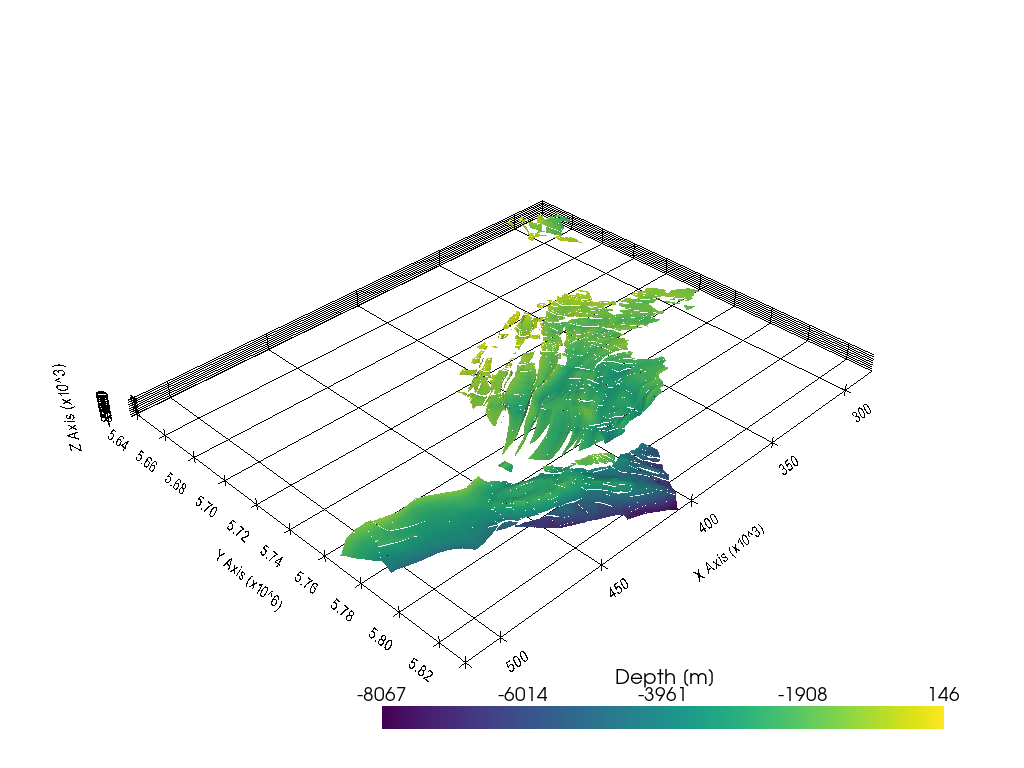

In [12]:
import pyvista as pv 
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(surf, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()

### Extracting Polygons from Faces

If you would like to display your mesh data or in particular the faces in a GIS, the faces can be converted to Shapely Polygons using ``create_polygons_from_faces(..)``. However, each connected surface is now divided in these triangles. The next step is to unify/merge the triangles that belonged to one surface before.

In [13]:
polygons = gg.vector.create_polygons_from_faces(mesh=surf, crs='EPSG:25832')
polygons

,geometry
0,"POLYGON Z ((297077.414 5677487.262 -838.496, 2..."
1,"POLYGON Z ((298031.070 5678779.547 -648.688, 2..."
2,"POLYGON Z ((297437.539 5676992.094 -816.608, 2..."
3,"POLYGON Z ((298031.070 5678779.547 -648.688, 2..."
4,"POLYGON Z ((295827.680 5680951.574 -825.328, 2..."
...,...
29266,"POLYGON Z ((344329.793 5706418.469 -393.606, 3..."
29267,"POLYGON Z ((344329.793 5706418.469 -393.606, 3..."
29268,"POLYGON Z ((344329.793 5706418.469 -393.606, 3..."
29269,"POLYGON Z ((345667.453 5707314.279 -470.917, 3..."


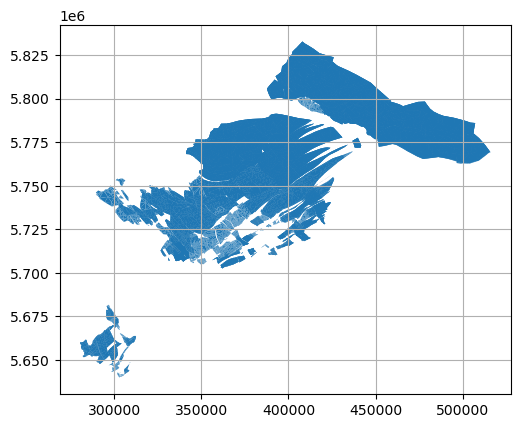

In [14]:
import matplotlib.pyplot as plt

polygons.plot()
plt.grid()

## Merging Triangles to Polygons

Adjacent triangle can now be merged to form single larger polygons using ``unify_polygons(..)``. 

**NB: Currently, Polygons overlapping in their Z dimension are being connected as the underlying Shapely ``unary_union(..)`` function does not account for these overlaps. This was mentioned here: https://github.com/Toblerity/Shapely/issues/1062.**

In [15]:
polygons = polygons[polygons.is_valid]
polygons_merged = gg.vector.unify_polygons(polygons=polygons)
polygons_merged

,geometry
0,"POLYGON Z ((291580.844 5649724.719 -1109.020, ..."
1,"POLYGON Z ((290608.406 5648212.812 -429.361, 2..."
2,"POLYGON Z ((290663.789 5649081.398 -611.540, 2..."
3,"POLYGON Z ((282206.945 5651577.906 -1157.900, ..."
4,"POLYGON Z ((288040.180 5652251.234 -1502.510, ..."
...,...
252,"POLYGON Z ((427861.164 5763280.822 -1735.720, ..."
253,"POLYGON Z ((426182.065 5765870.283 -1396.278, ..."
254,"POLYGON Z ((429349.305 5785956.133 -1630.430, ..."
255,"POLYGON Z ((437544.578 5773703.578 -2109.440, ..."


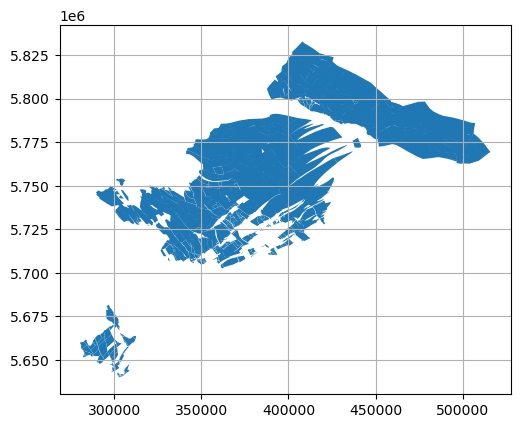

In [16]:
polygons_merged.plot()
plt.grid()

## Opening a second dataset with different file structure

It was encountered that the file structure of TS surfaces of the TUNB model for northern Germany have a different file structure. The code was adapted accordingly and now, both file structures can be opened. 

In [17]:
data2 = gg.raster.read_ts(file_path + '11_NI_sm.ts')

In [18]:
surf2 = gg.visualization.create_polydata_from_ts(data=data2, concat=False)
surf2.save(file_path + 'mesh2.vtk')
surf2

PolyData (0x276e0c84d60)
  N Cells:	1494602
  N Points:	807418
  N Strips:	0
  X Bounds:	3.249e+05, 6.742e+05
  Y Bounds:	5.717e+06, 5.987e+06
  Z Bounds:	-7.113e+03, 3.940e+02
  N Arrays:	1

C:\Users\ale93371\Anaconda3\envs\gemgis_test\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


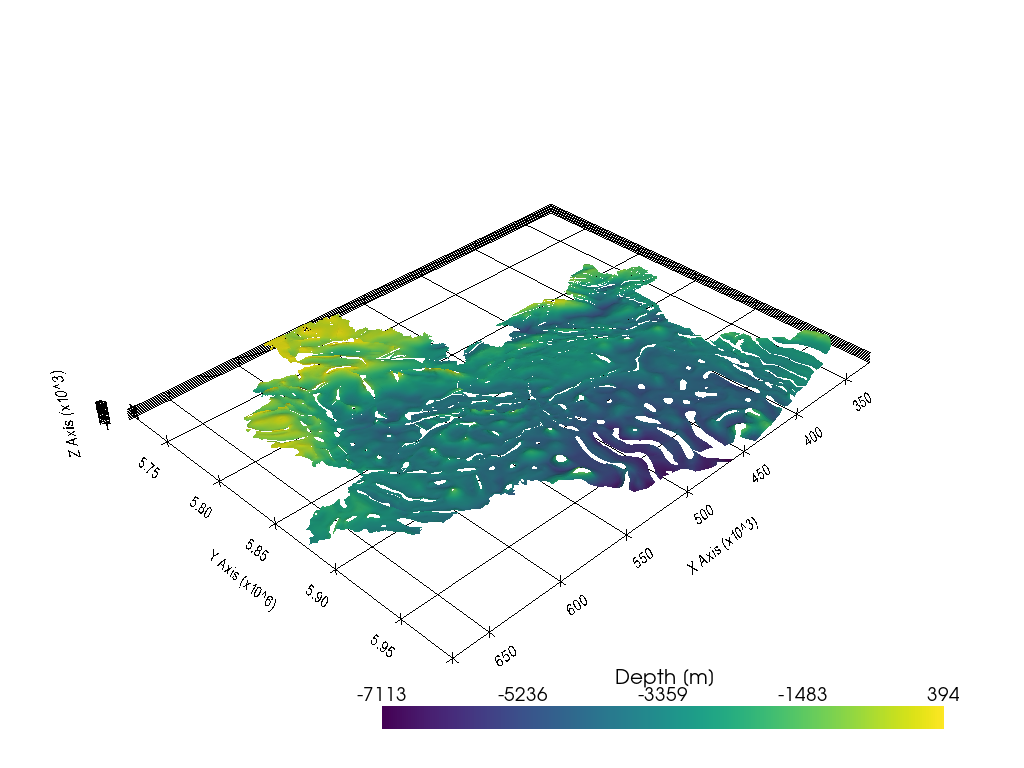

In [19]:
import pyvista as pv 
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(surf2, scalar_bar_args=sargs)

p.show_grid(color='black')
p.set_background(color='white')
p.show()